# Breast cancer classification 

Using the dataset from uci ml repository: Breast Cancer Wisconsin(Original)

benign - 2 - is noncancerous tumor
malignant - 4 - is cancerous tumor

In [3]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

In [7]:
file_path = "C:/Users/saiki/Desktop/Learning/Python/MachineLearning/data/breast_cancer/original/breast-cancer-wisconsin.data"

cols = [
    "id",
    "clump_thickness",
    "uniformity_of_cell_size",       
    "uniformity_of_cell_shape",      
    "marginal_adhesion",             
    "single_epithelial_cell_size",   
    "bare_nuclei",                   
    "bland_chromatin",               
    "normal_nucleoli",               
    "mitoses",
    "class"
]

df = pd.read_csv(file_path, sep=',',names=cols)
df.sample(10)

,id,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
526,769612,4,1,1,1,2,1,1,1,1,2
114,1173235,3,3,2,1,2,3,3,1,1,2
667,1348851,3,1,1,1,2,1,3,1,1,2
506,1286943,8,10,10,10,7,5,4,8,7,4
331,764974,5,1,1,1,2,1,3,1,2,2
231,1231387,6,8,7,5,6,8,8,9,2,4
391,1151734,10,8,7,4,3,10,7,9,1,4
307,666942,1,1,1,1,2,1,3,1,1,2
252,1017023,6,3,3,5,3,10,3,5,3,2
230,1230688,7,4,7,4,3,7,7,6,1,4


In [8]:
df = df.drop('id',axis=1)
df.sample(10)

,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
550,3,1,1,1,2,1,2,1,1,2
319,4,4,4,4,6,5,7,3,1,2
186,1,5,8,6,5,8,7,10,1,4
456,10,6,5,8,5,10,8,6,1,4
286,10,10,10,10,10,10,4,10,10,4
54,10,5,5,6,8,8,7,1,1,4
346,5,2,2,2,3,1,1,3,1,2
695,2,1,1,1,2,1,1,1,1,2
329,10,4,6,4,5,10,7,1,1,4
633,8,7,4,4,5,3,5,10,1,4


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   clump_thickness              699 non-null    int64 
 1   uniformity_of_cell_size      699 non-null    int64 
 2   uniformity_of_cell_shape     699 non-null    int64 
 3   marginal_adhesion            699 non-null    int64 
 4   single_epithelial_cell_size  699 non-null    int64 
 5   bare_nuclei                  699 non-null    object
 6   bland_chromatin              699 non-null    int64 
 7   normal_nucleoli              699 non-null    int64 
 8   mitoses                      699 non-null    int64 
 9   class                        699 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 54.7+ KB


In [13]:
# df['bare_nuclei'].sample(10)

df.describe()

,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,single_epithelial_cell_size,bland_chromatin,normal_nucleoli,mitoses,class
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [14]:
df['bare_nuclei'].unique()

array(['1', '10', '2', '4', '3', '9', '7', '?', '5', '8', '6'],
      dtype=object)

In [19]:
df = df.replace('?', np.nan)
df['bare_nuclei'] = pd.to_numeric(df['bare_nuclei'])

In [20]:
df['bare_nuclei'].unique()

array([ 1., 10.,  2.,  4.,  3.,  9.,  7., nan,  5.,  8.,  6.])

In [21]:
df['bare_nuclei'] = df['bare_nuclei'].fillna(df['bare_nuclei'].median())

In [22]:
df['bare_nuclei'].isnull().sum()

np.int64(0)

In [23]:
y = df['class']
X = df.drop('class',axis=1)

In [25]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

## Logistic Regression

In [26]:
logistic_regression_model = LogisticRegression()

logistic_regression_model.fit(X_train,y_train)

LogisticRegression()

In [27]:
logistic_regression_model_pred = logistic_regression_model.predict(X_test)
model_accuracy = accuracy_score(y_test,logistic_regression_model_pred)

In [30]:
print(f"Accuracy of logistic regression is {model_accuracy:.3f}")

Accuracy of logistic regression is 0.943


In [32]:
logistic_regression_report = classification_report(
    y_test, logistic_regression_model_pred
)
print("classification report:")
print(logistic_regression_report)

classification report:
              precision    recall  f1-score   support

           2       0.94      0.97      0.96       139
           4       0.94      0.89      0.91        71

    accuracy                           0.94       210
   macro avg       0.94      0.93      0.94       210
weighted avg       0.94      0.94      0.94       210



accuracy of model = 0.94, i.e model was able to classify 94% as correct classifcation.

precision of benign class = 0.94 i.e 94% of positive predictions that are actually correct.

precision of malignant class = 0.94 - 94% of positive predictions that are actually correct.


In [33]:
logistic_regression_confu_matrix = confusion_matrix(y_test, logistic_regression_model_pred)
print("Logistic Regression Model:")
print(logistic_regression_confu_matrix)

Logistic Regression Model:
[[135   4]
 [  8  63]]


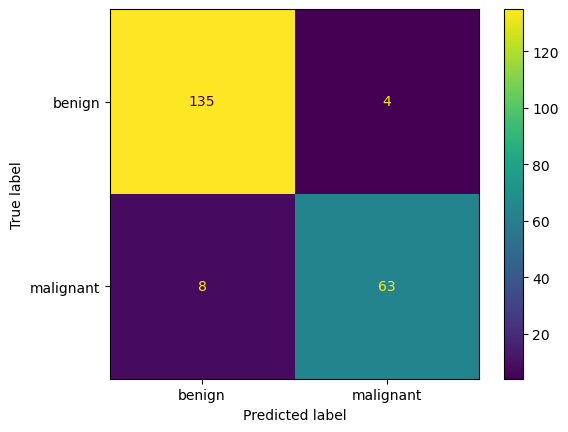

In [41]:
import matplotlib.pyplot as plt

confu_mat_display = ConfusionMatrixDisplay(confusion_matrix=logistic_regression_confu_matrix, display_labels=np.array(['benign','malignant']))
confu_mat_display.plot()

135 - True Positive -The model correctly predicted the benign type cancer.

4- False Positive - The model incorrectly predicted the benign class when it is actually malignant.

8 - False Negative - The model incorretly predicted the malignant when it is actually positive.

63 - True Negative - The model correctly predicted the malignant type cancer.

## SVM

In [42]:
svm_clf = SVC(kernel='linear')
svm_clf.fit(X_train,y_train)

SVC(kernel='linear')

In [44]:
y_pred = svm_clf.predict(X_test)
svc_acc = accuracy_score(y_test,y_pred)

print(f"svc model accuracy is {svc_acc}")

svc model accuracy is 0.9380952380952381


In [46]:
svc_clf_report = classification_report(y_test,y_pred)
print("SVC classification report:")
print(svc_clf_report)

SVC classification report:
              precision    recall  f1-score   support

           2       0.94      0.96      0.95       139
           4       0.93      0.89      0.91        71

    accuracy                           0.94       210
   macro avg       0.94      0.93      0.93       210
weighted avg       0.94      0.94      0.94       210



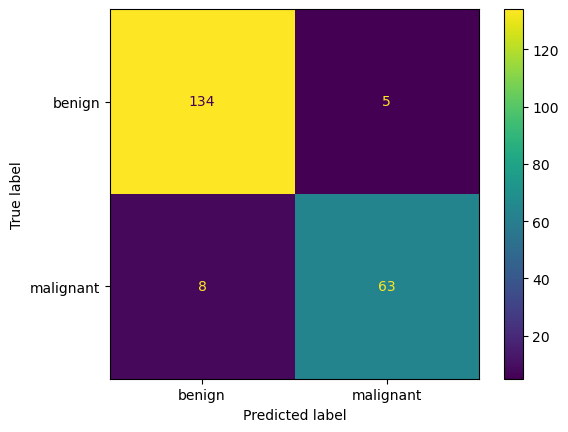

In [47]:
svc_cm = confusion_matrix(y_test, y_pred)
svc_conf_mat_disp = ConfusionMatrixDisplay(confusion_matrix=svc_cm, display_labels=np.array(['benign','malignant']))
svc_conf_mat_disp.plot()
plt.show()


### svm1

In [48]:
svc_clf1 = SVC(kernel='linear',gamma='scale',class_weight='balanced')
svc_clf1.fit(X_train,y_train)

SVC(class_weight='balanced', kernel='linear')

In [53]:
y_pred = svc_clf1.predict(X_test)

# accuracy
svc_clf1_acc = accuracy_score(y_test,y_pred)
print(f"Accuracy of svc_clf1 is {svc_clf1_acc:.2g}")

Accuracy of svc_clf1 is 0.96


In [51]:
# classifcation report for svc_clf1 model

svc_clf1_report = classification_report(y_test,y_pred)
print("classification report of svc_clf1 model:")
print(svc_clf1_report)

classification report of svc_clf1 model:
              precision    recall  f1-score   support

           2       0.97      0.96      0.97       139
           4       0.93      0.94      0.94        71

    accuracy                           0.96       210
   macro avg       0.95      0.95      0.95       210
weighted avg       0.96      0.96      0.96       210



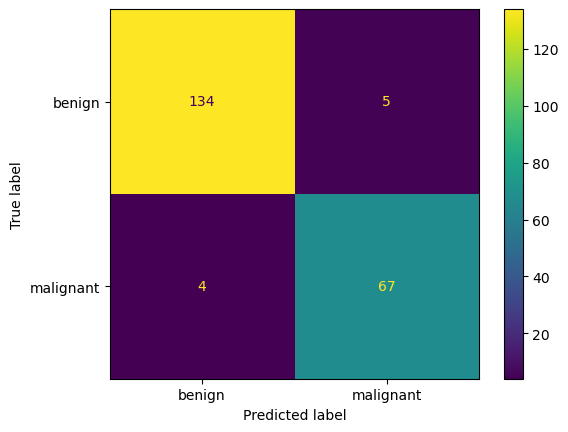

In [52]:
# confusion matrix and confusion matrix display

svc_clf1_cm = confusion_matrix(y_test,y_pred)

svc_clf1_cm_display = ConfusionMatrixDisplay(confusion_matrix=svc_clf1_cm,display_labels=np.array(['benign','malignant']))
svc_clf1_cm_display.plot()
plt.show()

## Random Forest Classifier

In [54]:
from sklearn.ensemble import RandomForestClassifier

In [55]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train,y_train)

RandomForestClassifier()

In [57]:
# predictions
y_pred = rf_clf.predict(X_test)

# accuracy score
rf_clf_acc = accuracy_score(y_test,y_pred)
print(f"accuracy of random forest classifier mode is {rf_clf_acc}")

accuracy of random forest classifier mode is 0.9523809523809523


In [58]:
# classification report

rf_clf_report = classification_report(y_test,y_pred)
print("Classification report of Random Forest Classifier Model:")
print(rf_clf_report)

Classification report of Random Forest Classifier Model:
              precision    recall  f1-score   support

           2       0.96      0.96      0.96       139
           4       0.93      0.93      0.93        71

    accuracy                           0.95       210
   macro avg       0.95      0.95      0.95       210
weighted avg       0.95      0.95      0.95       210



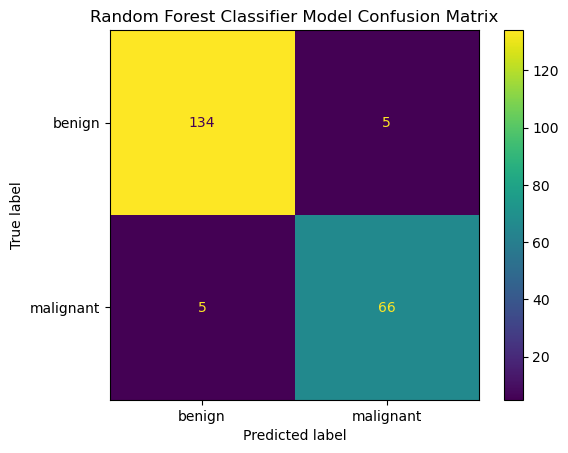

In [61]:
# confusion Matrix

rf_clf_cm = confusion_matrix(y_test,y_pred)

rf_clf_cm_display = ConfusionMatrixDisplay(confusion_matrix=rf_clf_cm, display_labels=np.array(['benign','malignant']))
rf_clf_cm_display.plot()
plt.title("Random Forest Classifier Model Confusion Matrix")
plt.show()

### rf_clf1 model

In [62]:
rf_clf1 = RandomForestClassifier(class_weight='balanced')
rf_clf1.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced')

In [64]:
# predictions
y_pred = rf_clf1.predict(X_test)

# accuracy score
rf_clf1_acc = accuracy_score(y_test,y_pred)
print(f"accuracy of random forest classifier mode is {rf_clf1_acc}")

accuracy of random forest classifier mode is 0.9523809523809523


In [65]:
rf_clf1_report = classification_report(y_test, y_pred)
print("classification report:")
print(rf_clf1_report)

classification report:
              precision    recall  f1-score   support

           2       0.96      0.96      0.96       139
           4       0.93      0.93      0.93        71

    accuracy                           0.95       210
   macro avg       0.95      0.95      0.95       210
weighted avg       0.95      0.95      0.95       210



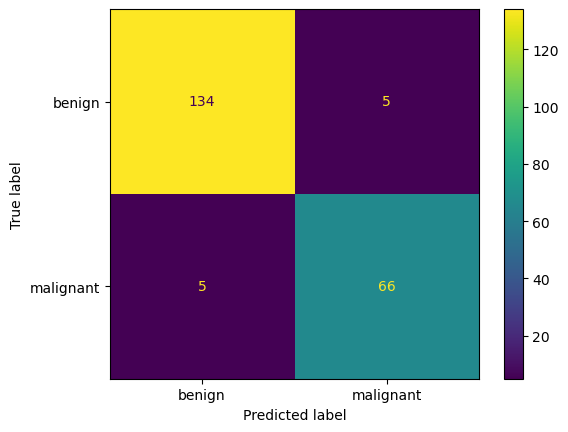

In [67]:
rf_clf1_cm = confusion_matrix(y_test,y_pred)
rf_clf1_cm_display = ConfusionMatrixDisplay(confusion_matrix=rf_clf1_cm,display_labels=np.array(['benign','malignant']))
rf_clf1_cm_display.plot()
plt.show()

## XGBClassifier

In [68]:
from xgboost import XGBClassifier

In [69]:
xgb_clf = XGBClassifier()

In [74]:
from sklearn.preprocessing import LabelEncoder

In [79]:
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=0.3)

In [81]:
ytrain = ytrain.map({2:0,4:1})
ytest = ytest.map({2:0,4:1})

In [82]:
xgb_clf.fit(xtrain,ytrain)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [83]:
ypred=xgb_clf.predict(xtest)
xgb_clf_acc = accuracy_score(ytest,ypred)
print(f"Accuracy of XGBClassifier is {xgb_clf_acc:.4g}")

Accuracy of XGBClassifier is 0.9667


In [84]:
# classification report

xgb_clf_report = classification_report(ytest,ypred)
print("Classification report of XGBClassifier:")
print(xgb_clf_report)

Classification report of XGBClassifier:
              precision    recall  f1-score   support

           0       0.99      0.96      0.97       141
           1       0.92      0.99      0.95        69

    accuracy                           0.97       210
   macro avg       0.96      0.97      0.96       210
weighted avg       0.97      0.97      0.97       210



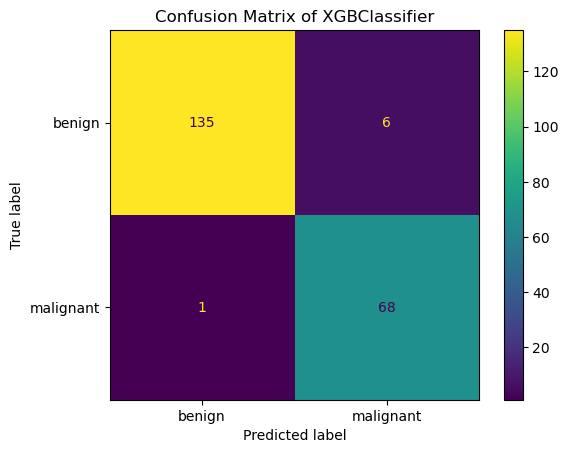

In [85]:
xgb_clf_cm = confusion_matrix(ytest,ypred)
xgb_clf_cm_display = ConfusionMatrixDisplay(confusion_matrix=xgb_clf_cm,display_labels=np.array(['benign','malignant']))
xgb_clf_cm_display.plot()
plt.title("Confusion Matrix of XGBClassifier")
plt.show()

# docs

In [56]:
rf_clf?

Type:        RandomForestClassifier
String form: RandomForestClassifier()
Length:      100
File:        c:\users\saiki\miniconda3\envs\dsml\lib\site-packages\sklearn\ensemble\_forest.py
Docstring:  
A random forest classifier.

A random forest is a meta estimator that fits a number of decision tree
classifiers on various sub-samples of the dataset and uses averaging to
improve the predictive accuracy and control over-fitting.
Trees in the forest use the best split strategy, i.e. equivalent to passing
`splitter="best"` to the underlying :class:`~sklearn.tree.DecisionTreeRegressor`.
The sub-sample size is controlled with the `max_samples` parameter if
`bootstrap=True` (default), otherwise the whole dataset is used to build
each tree.

For a comparison between tree-based ensemble models see the example
:ref:`sphx_glr_auto_examples_ensemble_plot_forest_hist_grad_boosting_comparison.py`.

Read more in the :ref:`User Guide <forest>`.

Parameters
----------
n_estimators : int, default=100
   

In [70]:
xgb_clf?

Type:        XGBClassifier
String form:
XGBClassifier(base_score=None, booster=None, callbacks=None,
           colsample_bylevel=None <...> ne, n_estimators=None, n_jobs=None,
           num_parallel_tree=None, random_state=None, ...)
File:        c:\users\saiki\miniconda3\envs\dsml\lib\site-packages\xgboost\sklearn.py
Docstring:  
Implementation of the scikit-learn API for XGBoost classification.
See :doc:`/python/sklearn_estimator` for more information.

Parameters
----------

    n_estimators : Optional[int]
        Number of boosting rounds.

    max_depth :  typing.Optional[int]

        Maximum tree depth for base learners.

    max_leaves : typing.Optional[int]

        Maximum number of leaves; 0 indicates no limit.

    max_bin : typing.Optional[int]

        If using histogram-based algorithm, maximum number of bins per feature

    grow_policy : typing.Optional[str]

        Tree growing policy.

        - depthwise: Favors splitting at nodes closest to the node,
        - 